<h1>Classify'em all!</h1>
<img src="figura.svg"/> 
<h2>Machine Learning 2019/2020 - Challenge 1 - 11 november 2019</h2>


<h3>Rules:</h3>
<ul>
    <li> - This year the results of the two challenges will counts 10% and 15% of your final score.</li>
    <li> - If you work with a group of colleges (max 3 students), please remember your solution must be "your solution", hence provide your individual answers/arguments/opinions/critics;</li>
    <li> - Students of the same group can share ONLY the code.</li>
    <li> - Mail your solution (a jupyter notebook, or a collection of source files and txt files or PDFs) only to stefano.faralli@unitelmasapienza.it before the 11:59 PM of the 12 November 2019 (Rome Berlin time);</li>
    <li> - The subject of your email must be: "[Challenge_1_solution] NAME - SURNAME - MATRICOLA."</li>
    <li> - Double check the subject of your email and the attachments;</li>
    <li> - In case you want to compress the attachments, USE ONLY STANDARD ZIP compression;</li>
    <li> - The physical attendance to the lab is not mandatory, you can work from a remote place by following the identical rules.</li>
    <li> - Your solution might be considered as the "copy" of others solutions, in that specific case the assigned score will be the result of the proposed solution divided by the number of "too much similar" solutions. If you share the code with the components of your "group" please comment the code and answer the questions by yourself. </li>
 </ul>
<h3>Instructions:</h3>
<ul>
 <li> - Monday 11 Novemeber, I will share the necessary key to decrypt the content of the provided challenge material  Zip (I will also send a message on the Google group).</li>
 <li> - To decrypt the content of the zip you will use the "Challenghe_1_setup.ipynb" and the above key</li>
 <li> - Then read carefully all the part of the jupyter notebook "decrypted/Challenghe_1.ipynb" and fill all mandatory fields.</li>
   </ul>

<H1>Identification (Mandatory)</H1>

In [374]:
# Identification
# assign the following string values
yourNameSurname='Giuseppe Fontana'
yourMatricolaNumber='1870948'
yourStudentEMAIL='fontana.1870948@studenti.uniroma1.it'
yourColleguesNameSurnames=['Fabio Galassi']

<H1>Part 1: Dataset  (5/30 p.ts)</H1>
<p> In the folder you can find the dataset "dataset_noisy.csv"</p>
<ol>
    <li>Spot and fix the errors (2/30 p.ts);<br> <b>PLEASE NOTE THE DATASET IS DIFFERENT FROM THE ONE YOU MAY FIND ELSEWHERE ON THE WEB</b></li>
    <li>Write the python code to save the corresponding "DataFrame" into file named "Pokemon_clean.csv" (respecting the original format); (1/30 p.ts)<br><b>PLEASE REMEBRER TO SEND the saved file by email</b></li>
    <li>Write the python code to generate the corresponding "DataFrame"; (1/30 p.ts) </li>
    <li>Show the DataFrame content and print the shape; (1/30 p.ts) </li>
 </ol>
 

In [415]:
############## here all the imports
import matplotlib as mpl
import graphviz as gv
import numpy as np
import pandas as pd
import sklearn as skl
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin\\'
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from draw_neural_net import draw_neural_net
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

##############################
import warnings; warnings.simplefilter('ignore')
##############################

Part 1:
we chase to clean the dataset by hand and some errors came out:
- Pokemon 160 was in the same line of Pokemon 159 (new line error typing);
- missing comma at pokemon 213 (between name and type1);
- a dot instead of comma separator at Pokemon 228;
- a comment in the line between pokemon 447 and 448;
- another comment in the end of Pokemon 453;
- on pokemon 859, missing double quotes and comma between type1 and type2.

We saved the cleaned version overwriting the previous one; 
than we opened it, re-saved with the requested name and re-built the dataset
(the shape of dataset is shown at the end of the output):

In [416]:
dataset = pd.read_csv('dataset_noisy.csv', encoding = "ISO-8859-1") #N.B: questo noisy è corretto a mano

# salvataggio (punto 1.2)
dataset.to_csv('Pokemon_clean.csv', index=False) 

# creazione dataframe (punto 1.3)
dataset = pd.read_csv('Pokemon_clean.csv', encoding = "ISO-8859-1") 

# lettura dataset e forma matrice (punto 1.4)
dataset

,Number,Name,Type1,Type2,Total,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,858,Paola Poipole,Poison,NaN,420,67,73,67,73,67,73,8,False
942,859,Naganadel Paola,Dragon,Ghost,540,74,73,75,127,71,122,8,False
943,858,Stakataka Paola,Steel,Rock,570,61,131,211,53,101,13,8,False
944,859,Blacephalon Paola,Ghost,Fire,570,53,127,53,151,79,107,8,False


<H1>Part 2: Data Analysis (5/30 p.ts)</H1>
<p> Using the above created dataset write the python code to:</li>
    <li>Count the number of Non-Legendary and Legendary Pokemon; (1/30 p.ts)</li>
    <li>Count the number of pokemons of the same "Type 1" category; (2/30 p.ts)</li>
    <li>Count the average HP for the pokemons of the same "Type 1" category; (2/30 p.ts)</li>
 </ol>

Here we essentially used the API's provided by pandas package:
in point 2.1:
    dataset[dataset['Legendary']==True] is the set of all legendary Pokemons;
    in order to show only the number, we restrict the output to che value requested.
    
in 2.2:
    we made elem to cycle in the type set, to compute the counting
    
in 2.3:
    similar structure as in 2.2; we also rounded the outcomes
    

In [417]:
# conteggio leggendari (punto 2.1)
leg= dataset[dataset['Legendary']==True]['Legendary'].count()

# conteggio NON leggendari
non_leg=dataset[dataset['Legendary']==False]['Legendary'].count() 

print('legendaries:', leg, '\nnon legendaries: ', non_leg)


legendaries: 103 
non legendaries:  843


In [418]:
# pokemon dello stesso tipo (punto 2.2)

types=set(dataset['Type1']) # this is the array of all the types(without repetitions)

for elem in types:
    print(elem, ': ', dataset[dataset['Type1']==elem]['Type1'].count())

Psychic :  85
Flying :  4
Dark :  34
Water :  124
Fairy :  19
Dragon :  36
Poison :  37
Ground :  34
Steel :  34
Ice :  24
Grass :  86
Normal :  110
Rock :  54
Fire :  59
Ghost :  37
Fighting :  33
Electric :  54
Bug :  82


In [419]:
#medie hp dello stesso tipo (punto 2.3)
for elem in types: # see previous code for types
    print(elem, ' mean hp: ', round(dataset[dataset['Type1']==elem]['HP'].mean(),2))

Psychic  mean hp:  77.12
Flying  mean hp:  70.75
Dark  mean hp:  80.59
Water  mean hp:  70.89
Fairy  mean hp:  72.95
Dragon  mean hp:  80.97
Poison  mean hp:  66.11
Ground  mean hp:  74.44
Steel  mean hp:  69.21
Ice  mean hp:  72.0
Grass  mean hp:  66.22
Normal  mean hp:  77.2
Rock  mean hp:  67.59
Fire  mean hp:  69.17
Ghost  mean hp:  64.32
Fighting  mean hp:  72.73
Electric  mean hp:  63.44
Bug  mean hp:  59.02


<h1>Part 3: Legendary Pokemon Classification (10/30 p.ts)</h1>
Using the above created dataset:
<ol>
<li> write the python code to implement two different classifier (by means of different algorithms) to classify an unobserved pokemon into the "Legendary" and "Non-Legendary" categories. Split your dataset in order to have a 80% for training and a 20% for testing. Train and Test with the resulting dataset; (2.5 p.ts for each calssifier (max p.ts 5))</li>
 <li> discuss the selection of the parameters (if any) you empirically choose to instanciate each classifier; (2.5 p.ts for each calssifier (max p.ts 5))</li></li>
</ol>

First of all we dropped Number, Name, Type1, Type2 and Generation from the classifier build-up, because they seem to be not very useful in order to know if a Pokemon is legendary or not
(maybe types could be included; I think types could infer some bias);
We kept the same parameters selection for both Models.

We built D-Tree and Multi-Layer perceptron and plotted them.

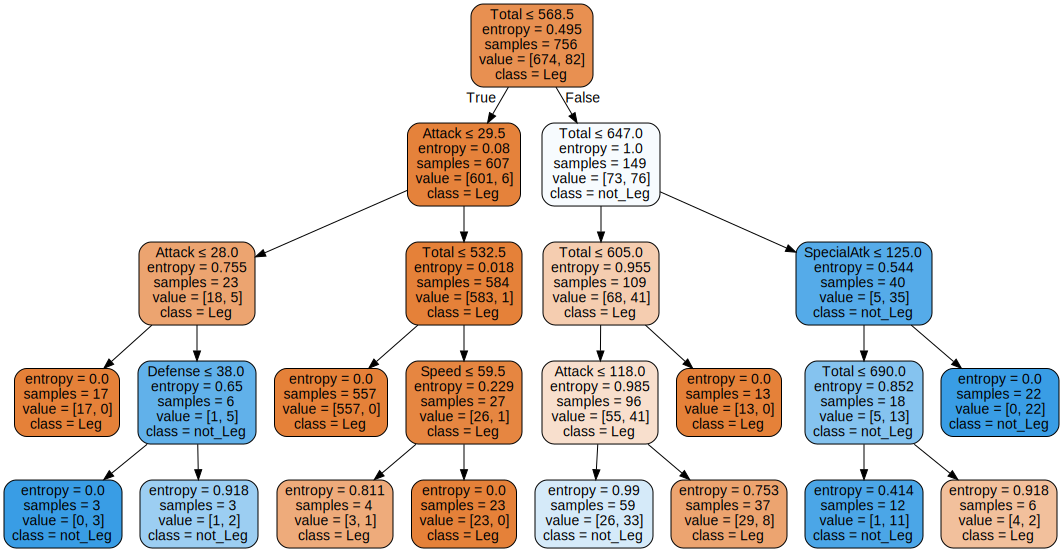

In [432]:
################## DTree 
features = dataset[['Total','HP','Attack','Defense','SpecialAtk','SpecialDef','Speed']] #generation è stata tolta

target = dataset[['Legendary']]

#creazione split
feat_train, feat_test, target_train, target_test = train_test_split(features, target, test_size=0.20, random_state=28) 

clf = tree.DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=4,
                                  min_samples_split=3,
                                  min_samples_leaf=2, 
                                  max_leaf_nodes=None)
clf = clf.fit(feat_train, target_train)

#plot
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=['Total','HP','Attack','Defense','SpecialAtk','SpecialDef','Speed'],  
                         class_names=['Leg','not_Leg'],  
                         filled=True, rounded=True,  
                         special_characters=True, max_depth=5
                         )  
graph = gv.Source(dot_data) 

graph.render("SFNY")
graph

In [430]:
########################## NN
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=500, solver='sgd')

#mlp = MLPClassifier(hidden_layer_sizes=(15, 15),
#                    activation='logistic',
#                    solver='sgd', 
#                    alpha=0.0001,
#                    learning_rate='constant',
#                    learning_rate_init=0.001, 
#                    max_iter=200,
#                    shuffle=True,
#                    tol=0.0001,
#                    momentum=0.9,
#                    early_stopping=False,
#                    validation_fraction=0.1,
#                    n_iter_no_change=10)



scaler = StandardScaler() 
scaler.fit(feat_train) 
feat_train_scaled=scaler.transform(feat_train)
mlp = mlp.fit(feat_train, target_train)

#plot
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')

layer_sizes = [1,10,10,1]
draw_neural_net(ax, .1, .9, .1, .9, layer_sizes, mlp.coefs_, mlp.intercepts_, mlp.n_iter_, mlp.loss_)
fig.savefig('nn_digaram.png')

<h1>Part 4: Evaluation (10/30 p.ts)</h1>
<p>Starting from the above created classifications provide:
<ol>
    <li> the number of TP, TN, FP, FN; (2 p.t for each calssifier (4 p.ts max))</li>
    <li> the precision, recall, f1 and accuracy + (90% confidence interval); (1 p.t for each calssifier (2 p.ts max))</li>
    <li> the full description of two wrongly classified pokemons (1 p.t for each calssifier (2 p.ts max))</li>
    <li> A discussion about the different classification outcomes. Why you obtain different classification performances?(1 p.t for each calssifier (2 p.ts max))</li>
</ol>
</p>


in 4.1:
    we used the predict method to compute latter confusion matrix; then we extracted TP, TN, FP, FN.
    
in 4.2:
    we searched for the right z-parameter for the std deviation on z-tables to have a 90% confidence range 
    (it was between 1.64 and 1.65);
    printed values are the mean values on 5 k-folding trials (through the cross_validate API)
    
in 4.3:
    We chase to print all wrong classified pokemons (with all parameters of the starting dataset).
    We had to perform some tricks on pandas structures, like working on a temporary well-crafted dataframe
    and implement a sort of join between starting table and prediction results, without lose the index on Pokemon dataset.
    
in 4.4:
    Playing with parameters, we saw that D-Tree is more accurate on the pokemon dataset; 
    more in general, since that CSV file is quite small and unbalanced (so many non-Legendaries),
    we got in trouble with Neural network parameter tuning; trees are more confortable in binary classifications.
    Trying several configurations on MLP, we didn't see very exciting estimators outcomes 
    (accuracy doesn't change at all and std. deviation is equal to 0, so algorithm keeps the same behaviour 
    changing the input during all the phases). 
    Probably also the random seed (random_state in the train_test_split()) made us quite unlucky 
    in wandering through the various settings.
    Even if some estimator for the MLP is good (accuracy), the model doesn't have nice performances;
    in some cases all the other estimators were under 0.5 and this means that ours MLP is "biased" 
    to classifying Pokemons as non-legendaries; good accuracy depends only on the large number of 
    non-legendaries in thepopulation.
    
Final remarks:
    we had a lot of troubles with Neural Network and spent most of the time to get why 
    different runs, tuning and domain splits gave us the same result.
    No problem with D-Tree, which gave a good performance, recorded also by estimators.

In [431]:
############ 4.1 (dtree)
predictions_tree = clf.predict(feat_test)
confusion_tree = skl.metrics.confusion_matrix(target_test,predictions_tree)

############ 4.1 (NN)
scaler = StandardScaler() 
scaler.fit(feat_test) 
feat_test_scaled=scaler.transform(feat_test) 
predictions_NN = mlp.predict(feat_test_scaled) 
predictions_NN 
confusion_NN = skl.metrics.confusion_matrix(target_test,predictions_NN)

print('DTree:\ntrue positives: ', confusion_tree[1][1], 
      '\ntrue negatives: ', confusion_tree[0][0],
     '\nfalse positives: ', confusion_tree[0][1],
     '\nfalse negatives: ', confusion_tree[1][0],
      '\n\nMulti-layer Perceptron:\ntrue positives: ', confusion_NN[1][1], 
      '\ntrue negatives: ', confusion_NN[0][0],
     '\nfalse positives: ', confusion_NN[0][1],
     '\nfalse negatives: ', confusion_NN[1][0])

DTree:
true positives:  20 
true negatives:  160 
false positives:  9 
false negatives:  1 

Multi-layer Perceptron:
true positives:  1 
true negatives:  159 
false positives:  10 
false negatives:  20


In [433]:
scoring = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']

############### 4.2 (tree)
scores_tree = cross_validate(clf, features, target, scoring=scoring,
                                                cv=5, return_train_score=True)
############### 4.2 (NN)
scores_NN = cross_validate(mlp, features, target, scoring=scoring,
                                                cv=5, return_train_score=True)

print('DTree:\nprecision: ', round(scores_tree["test_precision_macro"].mean(), 2),
     '\nrecall: ', round(scores_tree["test_recall_macro"].mean(), 2),
     '\nf1-score: ', round(scores_tree["test_f1_macro"].mean(), 2),
     '\naccuracy: ', round(scores_tree['test_accuracy'].mean(),2), ' +/- ', round(scores_tree['test_accuracy'].std()*1.645, 2),
      '\n\nMulti-level perceptron:\nprecision: ', round(scores_NN["test_precision_macro"].mean(), 2),
     '\nrecall: ', round(scores_NN["test_recall_macro"].mean(), 2),
     '\nf1-score: ', round(scores_NN["test_f1_macro"].mean(), 2),
     '\naccuracy: ', round(scores_NN['test_accuracy'].mean(),2), ' +/- ', round(scores_NN['test_accuracy'].std()*1.645, 2))

DTree:
precision:  0.84 
recall:  0.72 
f1-score:  0.74 
accuracy:  0.91  +/-  0.06 

Multi-level perceptron:
precision:  0.45 
recall:  0.5 
f1-score:  0.47 
accuracy:  0.89  +/-  0.0


In [434]:
############### 4.3 (Dtree)
df_pred_tree=pd.DataFrame(predictions_tree)
df_pred_tree.index = feat_test.index
df_pred_tree['expected']=target_test
differenti_tree=df_pred_tree[df_pred_tree[0]!=df_pred_tree['expected']]
#differenti.index
dataset.ix[differenti_tree.index]

,Number,Name,Type1,Type2,Total,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
906,823,Celesteela Stefano,Steel,Flying,570,97,101,103,107,101,61,8,False
867,784,Kommo-o,Dragon,Fighting,600,75,110,125,100,105,85,7,False
102,94,GengarMega Gengar,Ghost,Poison,600,60,65,80,170,95,130,1,False
939,856,Paola Magearna,Steel,Fairy,600,80,95,115,130,115,65,8,False
919,836,Zenaora Stefano,Electric,NaN,600,88,112,75,102,80,143,8,False
880,797,Celesteela,Steel,Flying,570,97,101,103,107,101,61,7,False
922,839,Paola Tapu Bulu,Grass,Fairy,570,69,131,115,85,95,75,8,True
908,825,Guzzlord Stefano,Dark,Dragon,570,223,101,53,97,53,43,8,False
23,18,PidgeotMega Pidgeot,Normal,Flying,579,83,80,80,135,80,121,1,False
713,647,KeldeoOrdinary Forme,Water,Fighting,580,91,72,90,129,90,108,5,False


In [436]:
############### 4.3 (MLP)
df_pred_NN = pd.DataFrame(predictions_NN)
df_pred_NN.index = feat_test.index
df_pred_NN['expected']=target_test
differenti_NN=df_pred_NN[df_pred_NN[0]!=df_pred_NN['expected']]
#differenti_NN
dataset.ix[differenti_NN.index]

,Number,Name,Type1,Type2,Total,HP,Attack,Defense,SpecialAtk,SpecialDef,Speed,Generation,Legendary
885,802,NecrozmaDawn Wings,Psychic,Ghost,680,97,113,109,157,127,77,7,True
262,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
550,492,ShayminLand Forme,Grass,NaN,600,100,100,100,100,100,100,4,True
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
883,800,Necrozma,Psychic,NaN,600,97,107,101,127,89,79,7,True
471,424,Ambipom,Normal,NaN,482,75,100,66,60,66,115,4,False
681,620,Mienshao,Fighting,NaN,510,65,125,60,95,60,105,5,False
419,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True


<h1>Part 5: Bonus</h1>
<ol>
<li>Additional 1 point will be assigned to those solutions where the resulting F1 is better than the one the Teacher was able to obtain himself.</li>
</ol>
